# Build 3D active shape model of the human face.

 * [Data Preprocessing](#data_preprocessing)

 * [Eigenface](#eigenface)

 * [Average Face](#avg_face)
 
 * [References](#references)
 

Keywords: "Active Shape Models" & "Eigen Faces"



In [1]:
import sys
import os

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

# https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_eigenfaces.html
from sklearn.decomposition import PCA

datapath = 'Synthetic500'
datapath_split = 'Synthetic500_split'
ext = '.obj'

## Data Preprocessing
<a id='data_preprocessing'></a>

 * The 3D coordinates of each face is picked and saved separately.

In [2]:
files = [f for f in os.listdir(datapath) if ext == os.path.splitext(f.lower())[-1]]

In [3]:
if not os.path.exists(datapath_split):
    os.mkdir(datapath_split)
    print(f'[Created] {datapath_split}.')
else:
    print(f'[Dir] {datapath_split} already exists.')
    

[Dir] Synthetic500_split already exists.


In [4]:
import time

def save_data(path, data, cols=None):
    df = pd.DataFrame(data, index=None, columns=cols)
    df.to_csv(path, index=False)
    
for f in files:
    f_path = os.path.join(datapath, f)
    i = 0
    # print(f_path)
    with open(f_path, 'r') as fopen:
        lines = fopen.readlines()
        
        root_name, ext = os.path.splitext(f)
        v3d = []; v3d_cols = ['x', 'y', 'z']; v3d_path = os.path.join(datapath_split, root_name + '_v.csv')
        vt2d = []; vt2d_cols = ['x', 'y']; vt2d_path = os.path.join(datapath_split, root_name + '_vt.csv')
        f3d = []; f3d_cols = ['x', 'y', 'z']; f3d_path = os.path.join(datapath_split, root_name + '_f.csv')
        for line in lines:
            line = line.strip().lower()
            if line.startswith('v '):
                line = line[2:].split()
                v3d.append(line)
            elif line.startswith('vt '):
                line = line[3:].split()
                vt2d.append(line)
            elif line.startswith('f '):
                line = line[2:].split()
                f3d.append(line)
#             print(f'v3d_len = {len(v3d)}, vt2d_len={len(vt2d)}, f3d_len={len(f3d)}')
        save_data(v3d_path, v3d, v3d_cols)
        save_data(vt2d_path, vt2d, vt2d_cols)
        save_data(f3d_path, f3d, f3d_cols)

In [5]:
v3d_files = [f for f in os.listdir(datapath_split) if f.endswith('_v.csv')]
vt2d_files = [f for f in os.listdir(datapath_split) if f.endswith('_vt.csv')]
f3d_files = [f for f in os.listdir(datapath_split) if f.endswith('_f.csv')]

In [6]:
for f in v3d_files:
    df = pd.read_csv(os.path.join(datapath_split, f))
    # print(f'file = {f}, shape = {df.values.shape}') # All has shape (7160, 3)

In [7]:
for f in vt2d_files:
    df = pd.read_csv(os.path.join(datapath_split, f))
    # print(f'file = {f}, shape = {df.values.shape}') # All has shape (7160, 2)

In [8]:
for f in f3d_files:
    df = pd.read_csv(os.path.join(datapath_split, f))
    # print(f'file = {f}, shape = {df.values.shape}') # All has shape (14050, 3) # 7160 * 2 = 14320

In [9]:
7160 * 2

14320

In [10]:
df_v3d = pd.read_csv(os.path.join(datapath_split, v3d_files[0]))
df_vt2d = pd.read_csv(os.path.join(datapath_split, vt2d_files[0]))
df_f3d = pd.read_csv(os.path.join(datapath_split, f3d_files[0]))

In [11]:
import random
v3d_ids = list(range(7160))
random.shuffle(v3d_ids)

In [12]:
n = 200
v3d_ids_tr = v3d_ids[:n]

In [13]:

vals_v3d = df_v3d.values
x, y, z = vals_v3d[:, 0], vals_v3d[:, 1], vals_v3d[:, 2]

x_v3d, y_v3d, z_v3d = vals_v3d[v3d_ids_tr, 0], vals_v3d[v3d_ids_tr, 1], vals_v3d[v3d_ids_tr, 2]

vals_vt2d = df_vt2d.values
x_vt2d, y_vt2d = vals_vt2d[:, 0], vals_vt2d[:, 1]

vals_f3d = df_f3d.values
x_f3d, y_f3d, z_f3d = vals_f3d[:, 0], vals_f3d[:, 1], vals_f3d[:, 2]

In [14]:
import itertools

colors = itertools.cycle(["r", "b", "g"])

In [15]:
random.shuffle(list(range(7160)))

## 3D Scatter Plot
<a id='plot_3d'> </a>

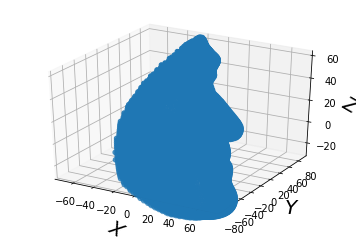

In [16]:
def plot_3d_coords(data, rand_sel=None):
    

        
    x, y, z = data[:, 0], data[:, 1], data[:, 2]
    if rand_sel is None:
        ids = list(range(7160))
        random.shuffle(ids)
        rand_sel = ids[:200]
        
    # x_r, y_r, z_r = x[rand_sel], y[rand_sel], z[rand_sel]
    
    
    fig = plt.figure()
    ax = plt.axes(projection="3d")

    # z_line = np.linspace(0, 15, 1000)
    # x_line = np.cos(z_line)
    # y_line = np.sin(z_line)
    # ax.plot3D(x, y, z, 'gray')

    # z_points = 15 * np.random.random(100)
    # x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
    # y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
    ax.scatter3D(x, y, z, zdir='x'); # ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');
    # ax.scatter3D(x_r, y_r, z_r, zdir='x', c="limegreen");

    ax.set_xlabel('$X$', fontsize=20, rotation=150)
    ax.set_ylabel('$Y$', fontsize=20)
    ax.set_zlabel('$Z$', fontsize=20, rotation=150)

    plt.show()
plot_3d_coords(vals_v3d)

In [17]:
t = np.random.randn(3, 4)

In [18]:
x, y, z = t

In [19]:
x.shape

(4,)

In [20]:
def load_all_data(fnames):
    x_train = []
    for i, f in enumerate(fnames):
        # print(i)
        df = pd.read_csv(os.path.join(datapath_split, f))
        x_train.append(df.values)

    x_train_np = np.array(x_train)
    return x_train_np


x_train_np = load_all_data(v3d_files)
f3d_avg = x_train_np.mean(axis=0)

In [21]:
x_train_np[0].shape

(7160, 3)

## Eigenfaces 
<a id='eigenface'> </a>

 * The 3D synthetic model of faces are used to get a eigen3Dmodel where at least 98% of variablility is captured by the PCA model with merely maximum of 24 points out of 7160 points. 
 
 * It is important is point out here about the nature of result, it is that the data is synthetic which is the reason for having such a low prinicipal components.  

In [22]:
def train_pcs(X, dims=3, n_components=200):
    pcas= []
    for i in range(dims):
        pca = PCA(n_components=n_components, whiten=False)
        pca.fit(X[:, :, i])
        pcas.append(pca)
    return pcas

pca_v3d = train_pcs(x_train_np, dims=3, n_components=0.98) # https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html





In [23]:
# dir(pca_v3d[0])

In [24]:
pca_v3d[2].explained_variance_ratio_

array([ 0.50758038,  0.16120063,  0.09730958,  0.04495608,  0.04059322,
        0.02742577,  0.01781235,  0.01352031,  0.01236557,  0.00943891,
        0.00781819,  0.00603421,  0.00466767,  0.00449936,  0.00427783,
        0.0040313 ,  0.00310981,  0.00264969,  0.00260735,  0.00229497,
        0.0020611 ,  0.00182604,  0.00179538,  0.00169373])

In [25]:
# plt.imshow((pca.mean_ + np.dot(pca.components_.T, X_train_pca[1, :])).reshape(faces.images[0].shape), cmap=plt.cm.bone) #
[pca.components_.T.shape for pca in pca_v3d]

[(7160, 17), (7160, 15), (7160, 24)]

In [26]:
def get_transformed_data(pcas, data, add_mean=True):
    assert data.shape[-1] in [2, 3], 'Last dimension must be co-ordinates'
    if data.ndim == 2:
        data = np.expand_dims(data, axis=0)
    
    num_cds = data.ndim
    
    pca_trf = [pcas[i].transform(data[..., i]) for i in range(num_cds)] # batch X num_feature
    
    if add_mean:
        # np.dot((500, 200), (200, 7160)) make (500, 7160)
        pca_trf_recover = [pcas[i].mean_ + np.dot(pca_trf[i], pcas[i].components_) for i in range(num_cds)] # (500, 7160)
    else:
        pca_trf_recover = [np.dot(pca_trf[i], pcas[i].components_) for i in range(num_cds)] # (500, 7160)
        
    pca_trf_recover = np.array(pca_trf_recover)
    
    
    if pca_trf[0].shape[1] != pca_trf[1].shape[1]:
        min_dim = min([pca.shape[1] for pca in pca_trf])
        print(pca_trf[0].shape[1] , pca_trf[1].shape[1], ', min = ', min_dim)
        
        pca_trf = [pca[:, :min_dim] for pca in pca_trf]
    
    pca_trf = np.array(pca_trf)
    pca_trf = pca_trf.transpose(1, 2, 0)
    
    
    return pca_trf, pca_trf_recover.transpose(1, 2, 0)
    
       

In [27]:
x_train_np_pca, x_train_np_trf = get_transformed_data(pca_v3d, x_train_np, add_mean=True)

17 15 , min =  15


In [28]:
x_train_np_pca.shape

(500, 15, 3)

In [29]:
x_train_np_pca[1].shape[1]

3

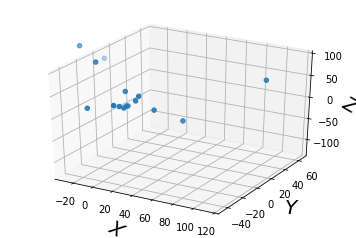

In [30]:
plot_3d_coords(x_train_np_pca[0])

In [31]:
x_train_np_trf.shape, x_train_np.shape

((500, 7160, 3), (500, 7160, 3))

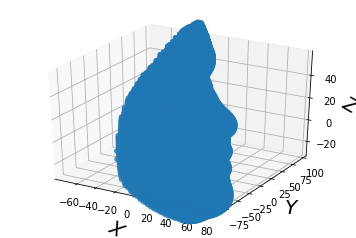

In [32]:
plot_3d_coords(x_train_np[2])

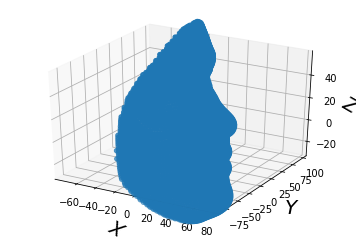

In [33]:
plot_3d_coords(x_train_np_trf[2])

## Average Face
 <a id='avg_face'> </a>
 
 * Average face of the dataset is visualized here.

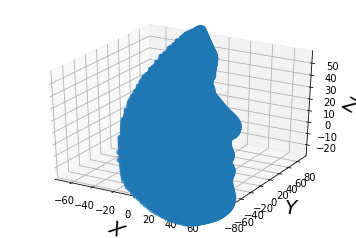

In [34]:
plot_3d_coords(f3d_avg)

In [35]:
f3d_avg, np.array([pca.mean_ for pca in pca_v3d]).transpose(1, 0)

(array([[-66.38996793,  11.45261467, -21.65891535],
        [-66.31566879,   9.62198108, -21.69891548],
        [-66.19696723,   7.7934675 , -21.80439777],
        ..., 
        [ 66.10224804,   7.77772789, -21.80280689],
        [ 66.2217735 ,   9.60673241, -21.69645563],
        [ 66.29722478,  11.43770812, -21.6552675 ]]),
 array([[-66.38996793,  11.45261467, -21.65891535],
        [-66.31566879,   9.62198108, -21.69891548],
        [-66.19696723,   7.7934675 , -21.80439777],
        ..., 
        [ 66.10224804,   7.77772789, -21.80280689],
        [ 66.2217735 ,   9.60673241, -21.69645563],
        [ 66.29722478,  11.43770812, -21.6552675 ]]))

## References
<a id='references'> </a>

 [1] White, Julie D., et al. "MeshMonk: Open-source large-scale intensive 3D phenotyping." Scientific reports 9.1 (2019): 1-11.

 [2] Cootes, Tim, E. R. Baldock, and J. Graham. "An introduction to active shape models." Image processing and analysis (2000): 223-248.